In [23]:
import tensorflow as tf

In [79]:
mnst_data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnst_data.load_data()
print('Training input data shape: ', X_train.shape)
print('Training label data shape: ', y_train.shape)
print('Testing input data shape: ', X_test.shape)
print('Training label data shape: ', y_test.shape)

Training input data shape:  (60000, 28, 28)
Training label data shape:  (60000,)
Testing input data shape:  (10000, 28, 28)
Training label data shape:  (10000,)


### Normalize the training data

In [80]:
X_train = X_train / 255
X_test = X_test / 255


### Build the model
* Here each image is of 28 x 28 pixel and we have 60000 images in the training dataset.
* In order to input the data for neural network, we need to flatten the data.
* input shape of the image is 28 x 28, since this is only grayscale image

In [52]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(input_shape = [X_train.shape[1], X_train.shape[2]]),
#     below is hidden layer of 128 neurons with relu activation function
         tf.keras.layers.Dense(units = 128,
                               activation = tf.nn.relu),
#     below is output layer, with total number of unique labels as the number of neurons
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.2,
                    batch_size = 128)

Epoch 1/5
375/375 [==============================] - 1s 2ms/step - loss: 0.5831 - accuracy: 0.8051 - val_loss: 0.4559 - val_accuracy: 0.8428
Epoch 2/5
375/375 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.8511 - val_loss: 0.4137 - val_accuracy: 0.8554
Epoch 3/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8645 - val_loss: 0.3835 - val_accuracy: 0.8630
Epoch 4/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8739 - val_loss: 0.3747 - val_accuracy: 0.8660
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8796 - val_loss: 0.3593 - val_accuracy: 0.8724


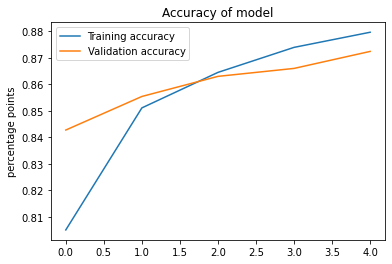

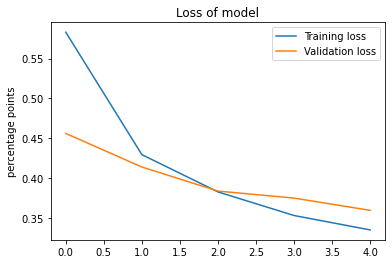

In [54]:
import matplotlib.pyplot as plt

def plot_graphs(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('percentage points')
    plt.title('Accuracy of model')
    plt.legend(['Training accuracy', 'Validation accuracy'])
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('percentage points')
    plt.title('Loss of model')
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

plot_graphs(history)

In [55]:
loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))

313/313 [==============================] - 0s 629us/step - loss: 0.3864 - accuracy: 0.8655
Accuracy of model on test data:  0.87


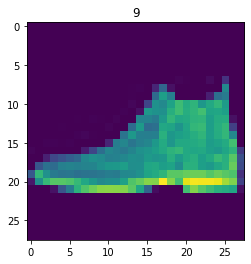

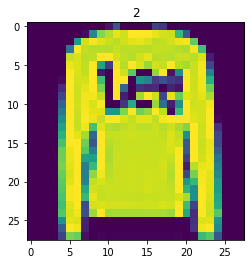

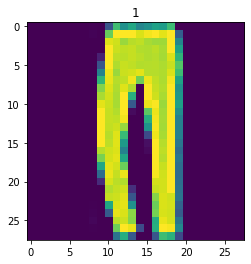

In [65]:
for i in range(3):
    plt.imshow(X_test[i])
    plt.title(y_test[i])
    plt.show()

### Visualizing the predictions in test data

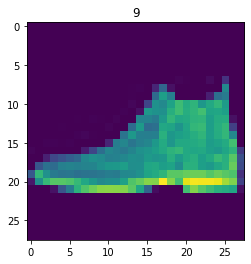

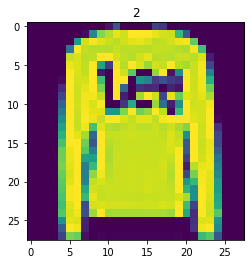

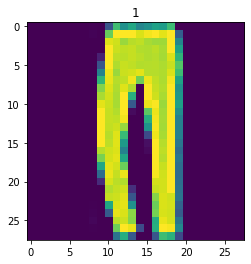

In [67]:
for i in range(3):
    plt.title(np.argmax(model.predict(X_test)[i]))
    plt.imshow(X_test[i])
    plt.show()

### New neural network with different hidden layer neurons

In [72]:
def model_test_hiddenlayerneurons(X_train, 
                                  y_train, 
                                  X_test, 
                                  y_test, 
                                  hidden_neurons,
                                  output_neurons = len(np.unique(y_train))):
    model = tf.keras.models.Sequential([
             tf.keras.layers.Flatten(input_shape = [X_train.shape[1], X_train.shape[2]]),
             tf.keras.layers.Dense(units = hidden_neurons,
                                   activation = tf.nn.relu),
             tf.keras.layers.Dense(units = output_neurons,
                                   activation = tf.nn.softmax)
    ])

    model.compile(
                 loss = 'sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

    history = model.fit(x = X_train,
                        y = y_train,
                        epochs = 5,
                        validation_split = 0.2,
                        batch_size = 128)

    def plot_graphs(history):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.ylabel('percentage points')
        plt.title('Accuracy of model')
        plt.legend(['Training accuracy', 'Validation accuracy'])
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.ylabel('percentage points')
        plt.title('Loss of model')
        plt.legend(['Training loss', 'Validation loss'])
        plt.show()

    plot_graphs(history)

    loss, accuracy = model.evaluate(x = X_test,
                   y = y_test)

    print('Accuracy of model on test data: ', round(accuracy, 2))

Epoch 1/5
375/375 [==============================] - 1s 4ms/step - loss: 0.5298 - accuracy: 0.8153 - val_loss: 0.4356 - val_accuracy: 0.8477
Epoch 2/5
375/375 [==============================] - 1s 3ms/step - loss: 0.3899 - accuracy: 0.8601 - val_loss: 0.3926 - val_accuracy: 0.8588
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8739 - val_loss: 0.3725 - val_accuracy: 0.8649
Epoch 4/5
375/375 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.8844 - val_loss: 0.3639 - val_accuracy: 0.8688
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.2969 - accuracy: 0.8907 - val_loss: 0.3473 - val_accuracy: 0.8708


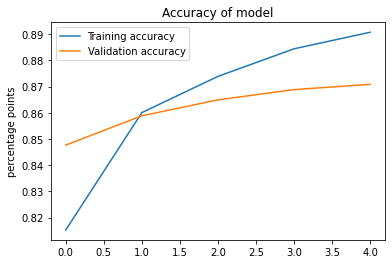

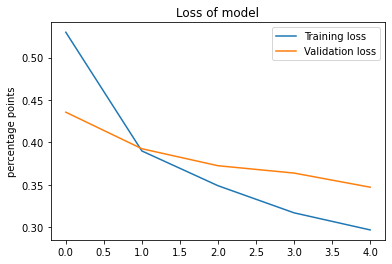

313/313 [==============================] - 0s 861us/step - loss: 0.3766 - accuracy: 0.8633
Accuracy of model on test data:  0.86


In [73]:
model_test_hiddenlayerneurons(X_train, 
                              y_train, 
                              X_test, 
                              y_test,
                              hidden_neurons = 512)

Epoch 1/5
375/375 [==============================] - 2s 7ms/step - loss: 0.5172 - accuracy: 0.8188 - val_loss: 0.3925 - val_accuracy: 0.8632
Epoch 2/5
375/375 [==============================] - 2s 7ms/step - loss: 0.3789 - accuracy: 0.8652 - val_loss: 0.3929 - val_accuracy: 0.8562
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.3367 - accuracy: 0.8774 - val_loss: 0.3472 - val_accuracy: 0.8737
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.3079 - accuracy: 0.8877 - val_loss: 0.3473 - val_accuracy: 0.8729
Epoch 5/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2893 - accuracy: 0.8929 - val_loss: 0.3317 - val_accuracy: 0.8827


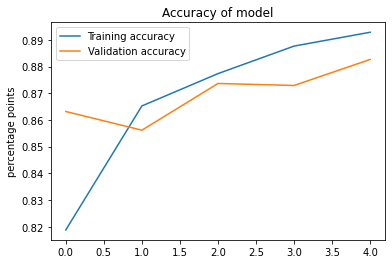

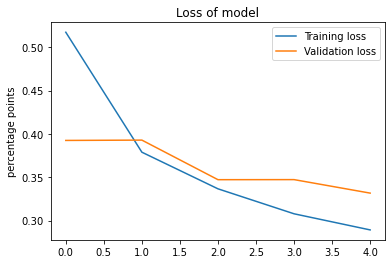

313/313 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8734
Accuracy of model on test data:  0.87


In [74]:
model_test_hiddenlayerneurons(X_train, 
                              y_train, 
                              X_test, 
                              y_test,
                              hidden_neurons = 1024)

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

### Try the neural network with wrong output number of neurons

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [75]:
model_test_hiddenlayerneurons(X_train, 
                              y_train, 
                              X_test, 
                              y_test,
                              hidden_neurons = 1024,
                              output_neurons = 5)

Epoch 1/5


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 8 8 9 8 9 9 6 9 3 1 4 5 9 0 6 1 4 3 3 5 5 7 3 5 1 8 8 3 1 7 8 4 0 3 8 0 0 3 0 4 9 0 9 5 1 9 1 9 5 2 6 0 6 3 5 4 6 9 3 8 0 0 5 1 6 6 6 8 4 8 5 5 5 9 1 7 1 9 1 4 0 9 7 7 1 9 2 8 9 8 2 4 6 6 7 5 8 1 5 2 2 4 1 5 7 4 8 0 5 9 3 2 8 5 7 6 3 2 2 2 5 7 0 3 9 4 0 4
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-72-6f60381ab3b5>:24) ]] [Op:__inference_train_function_83916]

Function call stack:
train_function


### Effect of another hidden layer on performance of model

Epoch 1/5
375/375 [==============================] - 4s 11ms/step - loss: 0.4954 - accuracy: 0.8221 - val_loss: 0.3856 - val_accuracy: 0.8617
Epoch 2/5
375/375 [==============================] - 4s 11ms/step - loss: 0.3573 - accuracy: 0.8676 - val_loss: 0.3599 - val_accuracy: 0.8672
Epoch 3/5
375/375 [==============================] - 4s 11ms/step - loss: 0.3193 - accuracy: 0.8813 - val_loss: 0.3401 - val_accuracy: 0.8800
Epoch 4/5
375/375 [==============================] - 4s 11ms/step - loss: 0.2911 - accuracy: 0.8919 - val_loss: 0.3484 - val_accuracy: 0.8761
Epoch 5/5
375/375 [==============================] - 5s 14ms/step - loss: 0.2753 - accuracy: 0.8970 - val_loss: 0.3242 - val_accuracy: 0.8838


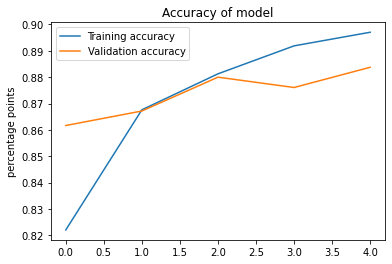

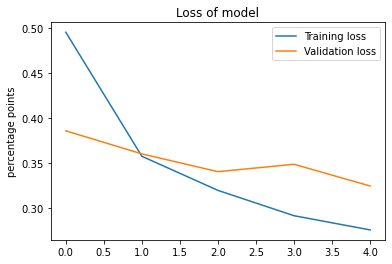

313/313 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8729
Accuracy of model on test data:  0.87


In [76]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(input_shape = [X_train.shape[1], X_train.shape[2]]),
         tf.keras.layers.Dense(units = 1024,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = 512,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.2,
                    batch_size = 128)

def plot_graphs(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('percentage points')
    plt.title('Accuracy of model')
    plt.legend(['Training accuracy', 'Validation accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('percentage points')
    plt.title('Loss of model')
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

plot_graphs(history)

loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))

### Run neural network without normalization of input data

Epoch 1/5
375/375 [==============================] - 4s 11ms/step - loss: 6.8431 - accuracy: 0.7709 - val_loss: 0.7537 - val_accuracy: 0.8199
Epoch 2/5
375/375 [==============================] - 4s 12ms/step - loss: 0.5883 - accuracy: 0.8345 - val_loss: 0.5732 - val_accuracy: 0.8242
Epoch 3/5
375/375 [==============================] - 4s 11ms/step - loss: 0.4273 - accuracy: 0.8564 - val_loss: 0.4996 - val_accuracy: 0.8382
Epoch 4/5
375/375 [==============================] - 4s 11ms/step - loss: 0.3774 - accuracy: 0.8683 - val_loss: 0.4404 - val_accuracy: 0.8562
Epoch 5/5
375/375 [==============================] - 6s 15ms/step - loss: 0.3593 - accuracy: 0.8720 - val_loss: 0.5032 - val_accuracy: 0.8355


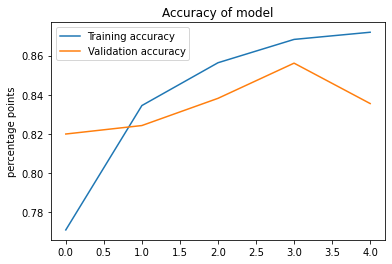

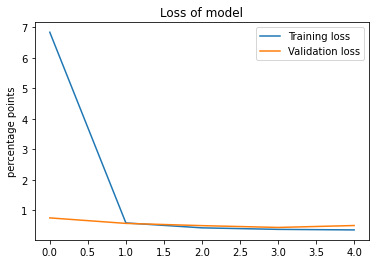

313/313 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.8304
Accuracy of model on test data:  0.83


In [77]:
mnst_data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnst_data.load_data()
model = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(input_shape = [X_train.shape[1], X_train.shape[2]]),
         tf.keras.layers.Dense(units = 1024,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = 512,
                               activation = tf.nn.relu),
         tf.keras.layers.Dense(units = len(np.unique(y_train)),
                               activation = tf.nn.softmax)
])

model.compile(
             loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(x = X_train,
                    y = y_train,
                    epochs = 5,
                    validation_split = 0.2,
                    batch_size = 128)

def plot_graphs(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('percentage points')
    plt.title('Accuracy of model')
    plt.legend(['Training accuracy', 'Validation accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('percentage points')
    plt.title('Loss of model')
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

plot_graphs(history)

loss, accuracy = model.evaluate(x = X_test,
               y = y_test)

print('Accuracy of model on test data: ', round(accuracy, 2))